# Imports

In [1]:
# Python standard library

# Scipy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Other
import PIL

### Load image

In [2]:
# Open image
input_image_filepath = '/home/prestonh/Desktop/Programming/gamedev/shoot/resources/rooms/prototype/prototype_room.bmp'
room_image = PIL.Image.open(input_image_filepath)
room_array = np.array(room_image)

# Create empty tilemap
room_tilemap = -1*np.ones((room_array.shape[0]/16, room_array.shape[1]/16), dtype = int)

### Define colors

In [3]:
black = [0,0,0]
white = [255,255,255]

### Empty tiles

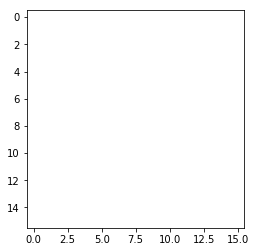

In [4]:
empty_tile = room_array[128:144, 128:144]
plt.imshow(empty_tile)
plt.show()

In [5]:
for i in range(room_tilemap.shape[0]):
    for j in range(room_tilemap.shape[1]):
        pix_y = 16*i
        pix_x = 16*j
        tile = room_array[pix_y:pix_y + 16, pix_x:pix_x + 16]
        if np.array_equal(tile, empty_tile):
            room_tilemap[i,j] = 0

### Solid tiles

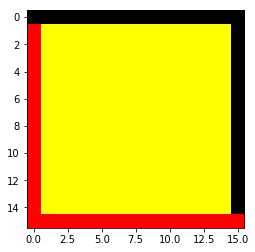

In [6]:
solid_tile = room_array[:16,:16]
plt.imshow(solid_tile)
plt.show()

In [7]:
for i in range(room_tilemap.shape[0]):
    for j in range(room_tilemap.shape[1]):
        pix_y = 16*i
        pix_x = 16*j
        tile = room_array[pix_y:pix_y + 16, pix_x:pix_x + 16]
        if np.array_equal(tile, solid_tile):
            room_tilemap[i,j] = 1

### Ramp tiles

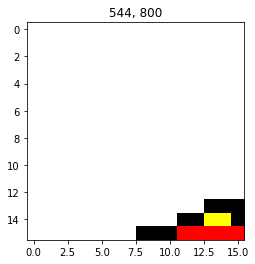

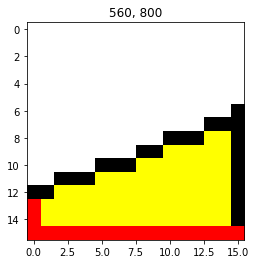

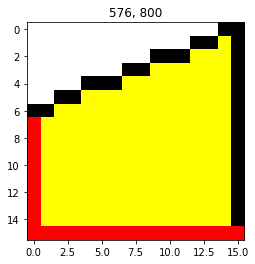

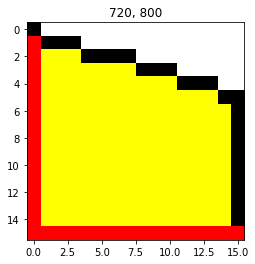

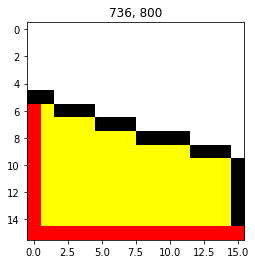

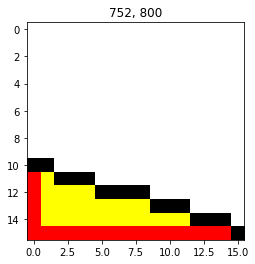

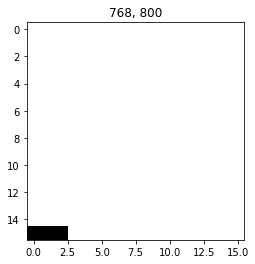

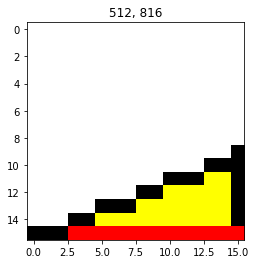

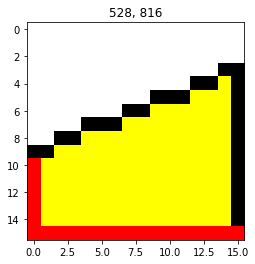

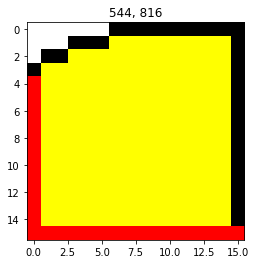

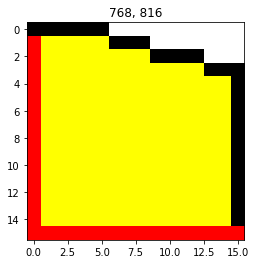

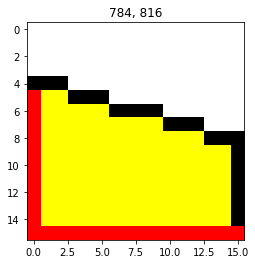

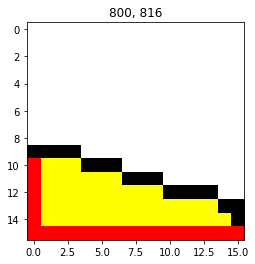

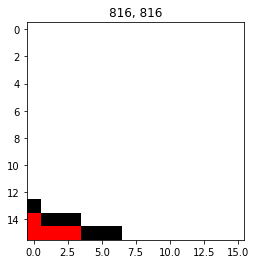

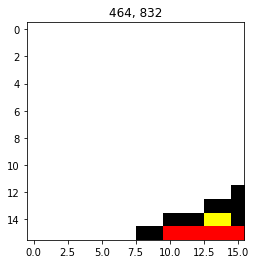

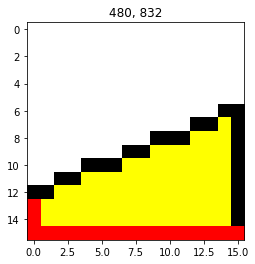

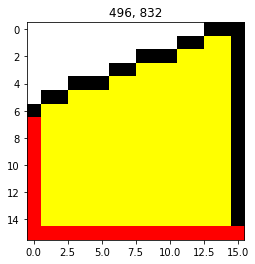

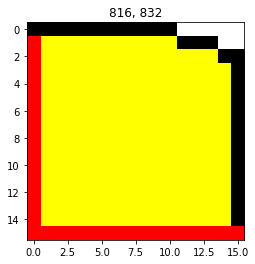

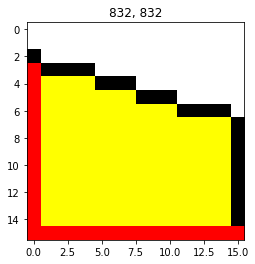

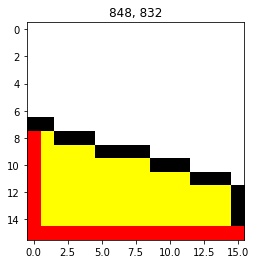

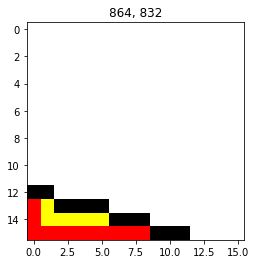

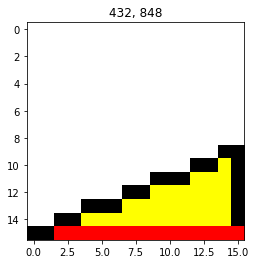

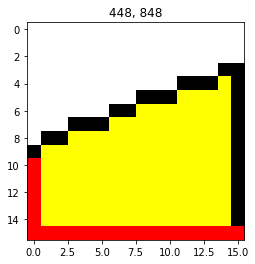

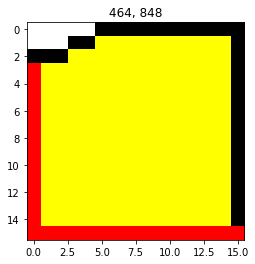

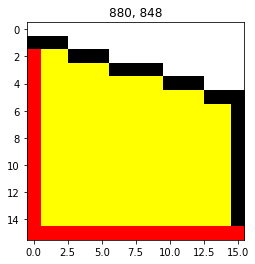

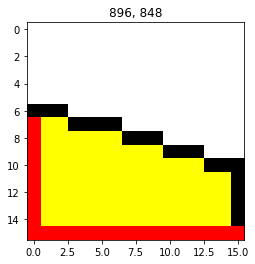

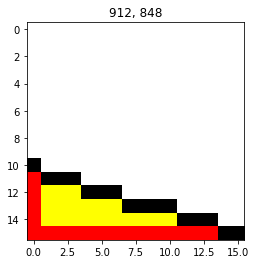

In [8]:
for i in range(room_tilemap.shape[0]):
    for j in range(room_tilemap.shape[1]):
        pix_y = 16*i
        pix_x = 16*j
        tile = room_array[pix_y:pix_y + 16, pix_x:pix_x + 16]
        if not np.array_equal(tile, empty_tile) and not np.array_equal(tile, solid_tile):
            plt.title(str(pix_x)+', '+str(pix_y))
            plt.imshow(tile)
            plt.show()

In [9]:
pixel = room_array[[500,500]]
print pixel
print np.array_equal(pixel, white)

[[[255   0   0]
  [255 255   0]
  [255 255   0]
  ..., 
  [255 255   0]
  [255 255   0]
  [  0   0   0]]

 [[255   0   0]
  [255 255   0]
  [255 255   0]
  ..., 
  [255 255   0]
  [255 255   0]
  [  0   0   0]]]
False


##### Get coords of floor pixels

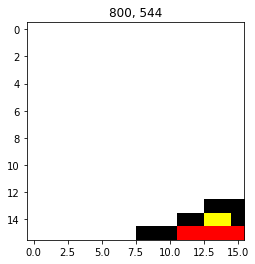

[815 552]
[15  8]
[813 559]
[13 15]


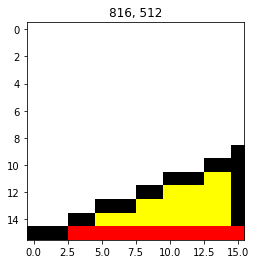

[831 512]
[15  0]
[825 527]
[ 9 15]


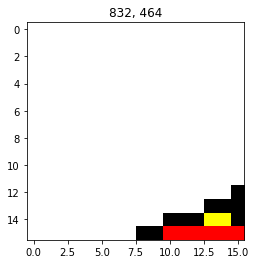

[847 472]
[15  8]
[844 479]
[12 15]


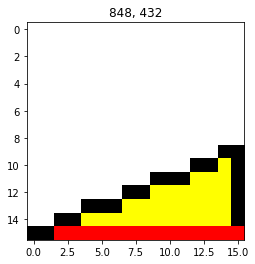

[863 432]
[15  0]
[857 447]
[ 9 15]


In [26]:
# Scan around the perimiter of a tile and look for a black pixel connected to a white pixel; the black pixel is
# guaranteed to be one of the two slope pixels we are looking for.

for i in range(room_tilemap.shape[0]):
    for j in range(room_tilemap.shape[1]):
        pix_y = 16*i
        pix_x = 16*j
        tile = room_array[pix_y:pix_y + 16, pix_x:pix_x + 16]
        
        if (not np.array_equal(tile, empty_tile)) and (not np.array_equal(tile, solid_tile)):

            plt.imshow(tile)
            plt.title(str(pix_y) + ', ' + str(pix_x))
            plt.show()
            
            slope_pixels = []
            
            # Scan horizontal top
            a = [pix_y, pix_x]
            b = [pix_y, pix_x+1]
            for i in range(15):
                if (np.array_equal(room_array[a[0], a[1]], black) and np.array_equal(room_array[b[0], b[1]], white)):
                    slope_pixels.append(np.copy(a))
                elif (np.array_equal(room_array[a[0], a[1]], white) and np.array_equal(room_array[b[0], b[1]], black)):
                    slope_pixels.append(np.copy(b))

                a[1] += 1
                b[1] += 1
                
                

            # Scan vertical right
            a = [pix_y, pix_x + 15]
            b = [pix_y + 1, pix_x + 15]
            for i in range(15):
                if (np.array_equal(room_array[a[0], a[1]], black) and np.array_equal(room_array[b[0], b[1]], white)):
                    slope_pixels.append(np.copy(a))
                elif (np.array_equal(room_array[a[0], a[1]], white) and np.array_equal(room_array[b[0], b[1]], black)):
                    slope_pixels.append(np.copy(b))

                a[0] += 1
                b[0] += 1

            # Scan horizontal bottom
            a = [pix_y + 15, pix_x + 15]
            b = [pix_y + 15, pix_x + 14]
            for i in range(15):
                if (np.array_equal(room_array[a[0], a[1]], black) and np.array_equal(room_array[b[0], b[1]], white)):
                    slope_pixels.append(np.copy(a))
                elif (np.array_equal(room_array[a[0], a[1]], white) and np.array_equal(room_array[b[0], b[1]], black)):
                    slope_pixels.append(np.copy(b))

                a[1] -= 1
                b[1] -= 1

            # Scan vertical left
            a = [pix_y+15, pix_x]
            b = [pix_y + 14, pix_x]
            for i in range(15):
                if (np.array_equal(room_array[a[0], a[1]], black) and np.array_equal(room_array[b[0], b[1]], white)):
                    slope_pixels.append(np.copy(a))
                elif (np.array_equal(room_array[a[0], a[1]], white) and np.array_equal(room_array[b[0], b[1]], black)):
                    slope_pixels.append(np.copy(b))

                a[0] -= 1
                b[0] -= 1
            
            pix1 = np.copy(slope_pixels[0])
            pix2 = np.copy(slope_pixels[1])
            if pix1[1] > pix2[1]:
                temp = np.copy(pix1)
                pix1 = np.copy(pix2)
                pix2 = np.copy(temp)
            
            print pix1
            print pix1%16
            print pix2
            print pix2%16
                
            
            


### Default tiles

In [11]:
for i in range(room_tilemap.shape[0]):
    for j in range(room_tilemap.shape[1]):
        if room_tilemap[i,j] == -1:
            room_tilemap[i,j] = 1

### Save numpy array to tilemap (.tmp) file

In [17]:
output_tilemap_filepath = input_image_filepath.replace('.bmp', '.tmp')
print output_tilemap_filepath

/home/prestonh/Desktop/Programming/gamedev/shoot/resources/rooms/prototype/prototype_room.tmp


In [ ]:
for i in range()

In [19]:
np.savetxt(output_tilemap_filepath, room_tilemap, fmt = '%i', delimiter=',', newline='\n', header='', footer='')